# Algoritmo de Grover
## Tópicos Avançados em Algoritmos
### Centro de Informática - UFPE

Equipe:
- Alexandre Burle (aqb)
- Humberto Lopes (hlfs2)
- Matheus Andrade (mvtna)
- Uanderson Ricardo (urfs)


# Introdução

Em computação quântica, O algoritmo de Grover é um algoritmo quântico que encontra com alta probabilidade a entrada exclusiva para uma função de caixa preta que produz um valor de saída específico, usando apenas avaliações da função, em que N é o tamanho do domínio da função. O algoritmo foi inventado por Lov Grover em 1996.

O algoritmo de Grover pode ser utilizado a qualquer problema que possa ser resolvido por um algoritmo clássico de busca por força bruta.

Entretanto, embora o propósito do algoritmo de Grover seja usualmente descrito como "pesquisar num banco de dados", pode ser mais preciso descrevê-lo como "inverter uma função". Dando uma explicação meio genérica, temos que se uma função $Y = F(X)$ pode ser avaliada por um computador quântico, o algoritmo de Grover calcula $X$ quando dado $Y$. A inversão de uma função está relacionada à pesquisa de um banco de dados, porque poderíamos criar uma função que produzisse um valor específico de $Y$ (`true`, por exemplo) se $X$ corresponde a uma entrada desejada no banco e outro valor de $Y$ (`false`) para outros valores de $X$.

Ainda que o algoritmo de Grover não seja o mais rápido, ele é um dos algoritmos mais importantes propostos para a computação quântica.


# Requisitos para Execução
1. Precisamos dispor de uma base de dados com $N$ entradas;
2. Que esta base de dados contenha o valor buscado;
3. Que $x$ seja uma posição do banco de dados;
4. Que exista uma função $f$ que realiza a checagem de um dado elemento, indicando se ele é o elemento buscado;
5. Que tenhamos $n$ qubits, onde $n = log_2 N \therefore N = 2^n$.


# Exemplo de Melhoria
O algoritmo de pesquisa de Lov Grover opera sobre um conjunto de dados desordenado, o qual contém o item desejado, como comentado pelos requisitos anteriormente. O algoritmo faz o trabalho de busca em $\sqrt{N}$ consultas.

Embora o algoritmo de Grover não supere a melhoria exponencial de outros algoritmos famosos como o algoritmo de Deutsch-Jozsa e do algoritmo de Simon, a sua performance ainda é muito boa, pois conseguimos uma melhoria quadrática no custo da busca. Ou seja, supondo uma busca clássica em um array de 100 elementos, onde cada checagem dura 1 segundo. O tempo máximo seria de 100 segundos e o tempo médio de 50 segundos. Com o algoritmo de Grover, podemos realizar essa busca em 10 segundos.

É interessante pontuar que o algoritmo de Grover tem muitas aplicações à teoria das bases de dados e outras áreas também.


# Primeira Tentativa

## Operador $f$
Como discutido, a execução do algoritmo depende de uma função $f(x)$, a qual checa se um dado $x$ do banco de dados é o que buscamos. Na verdade, a função $f(x)$ se transforma em uma matriz unitária, um operador linear que implementa $f$. Iremos denotar esse operador linear como $U_f$.

Nesse caso, podemos representar $U_f$ como um circuito quântico que recebe como entrada um $| x \rangle$ e um $| y \rangle$ em dois registradores e nos retorna como saída este $| x \rangle$ e um vetor, cujo valor será definido pelo XOR entre o vetor de entrada do registrador e do valor da função $f$ para este valor.

### Exemplo
Se $n = 2$. Ou seja, temos 2 qubits para representar o conjunto de dados. E buscamos a string binária $‘10’$. Então, o operador $U_f$ apresentaria a seguinte repreentação.

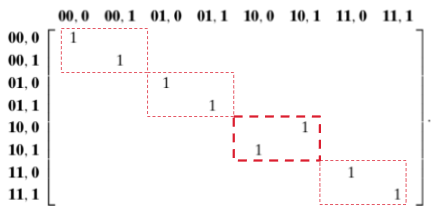

Se $x_0 = 10$, então $f(00) = f(01) = f(11) = 0$, e $f(10) = 1$. Assim, o operador linear é definido com a diagonal da matriz composta por 1’s em todos os lugares que não apresentam a string buscada, e apresenta 1 onde a entrada é a string buscada e o $| y \rangle$ apresenta um valor complementar da função, de acordo com $y \space XOR \space f(x)$.

## Circuito Quântico
Dessa forma, como primeira tentativa para resolver o problema da busca temos o seguinte circuito quântico, o qual pode ser representado, inclusive, de uma maneira mais matemática/matricial: $U_f\left(H^{\otimes n} \otimes I\right) | 0, 0 \rangle$.

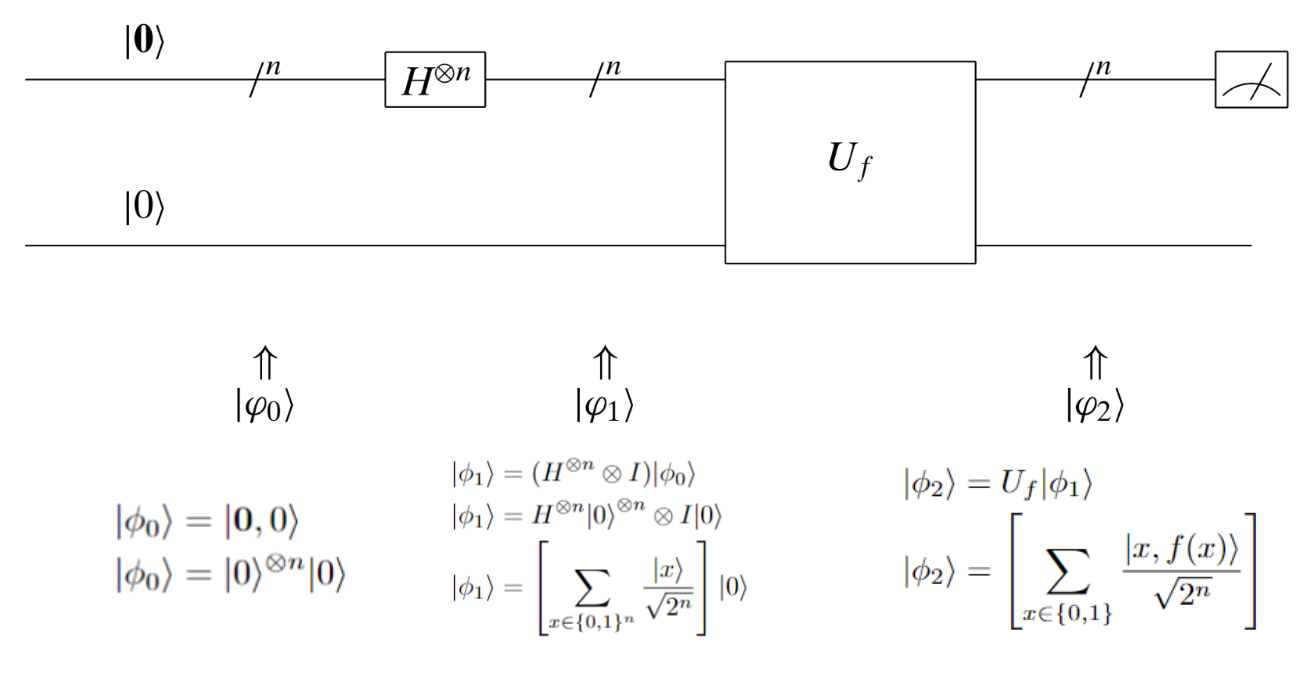

Neste ponto, podemos medir os qubits de saída para verificar a resposta. Entretanto, sabemos que as coisas na mecânica quântica não são exatas. Assim, a medição dos qubits de cima não será útil para encontramos a resposta que buscamos, pois todos os estados terão a mesma probabilidade de observação na medição. Se medirmos o qubit inferior e seu valor for 1, então sabemos que a resposta no primeiro registrador é a correta. Entretanto, se existem $2^n$ cadeias e buscamos uma delas, então a probabilidade de medirmos 1 no segundo registrador é $\frac{1}{2^n}$, o que é bastante raro.


# Algoritmo de Grover
Tendo em vista o problema apresentado, surgiu a solução do algoritmo de Grover. Como os estados quânticos estão superpostos, é necessário utilizar técnicas para aproximar a resposta. O ponto é que: queremos uma distribuição de probabilidade dos resultados tal que a probabilidade de obter a solução numa dada execução do algoritmo seja superior à de obter um resultado inválido. Uma vez que a probabilidade de obter um resultado incorreto é diferente de zero, podem ser necessárias mais execuções para se chegar a uma aproximação confiável. Assim, Grover utilizou dois truques: o oráculo e o difusor, os quais serão apresentados de maneira mais detalhada no decorrer deste documento, assim como o processo de execução do algoritmo de grover.


# Implementação

## Bibliotecas

Para o desenvolvimento do algoritmo de Grover, foram utilizadas as bibliotecas do Qiskit e o NumPy.

### Qiskit
O Qiskit é uma biblioteca de código aberto que oferece uma plataforma abrangente para programar algoritmos quânticos. Ele permite a criação de circuitos quânticos, a execução em computadores quânticos reais ou simuladores, e oferece ferramentas de visualização para análise dos resultados. Dos módulos importados do Qiskit, destaca-se o Aer. O Aer é um componente do Qiskit que fornece um simulador quântico altamente otimizado. Ele permite simular o comportamento de circuitos quânticos em ambientes controlados, o que é crucial para o desenvolvimento e teste de algoritmos quânticos.

### NumPy
Embora não seja uma biblioteca específica para computação quântica, o NumPy é uma biblioteca de computação numérica amplamente utilizada em Python. Ela desempenha um papel fundamental ao auxiliar nos cálculos e manipulações de dados necessários durante o desenvolvimento e análise de algoritmos quânticos.

In [ ]:
!pip install qiskit ipywidgets pylatexenc qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=fe6fff6b39854af74107edabce9e3f204ff49f501abb92e0292c47795be51e4f

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

## Oráculo

O oráculo na computação clássica seria algo como a função $f(x)$, que vai checar cada elemento de uma lista, e retornar 1 se for o elemento que buscamos ou 0 se não for. Para computação quântica temos o operador $U_f$ que realiza a operação definida por essa função $f(x)$.

### Geometria do Oráculo
De maneira mais geométrica, esse operador é responsável por realizar uma reflexão em torno de $| x' \rangle$, onde $| x' \rangle$ é dado de entrada, $| \psi \rangle$, sem o estado quântico que procuramos ($\omega$). Assim, $| x' \rangle$ é ortogonal ao $| \omega \rangle$.

Como resultado da operação do oráculo, temos que essa reflexão irá fazer com que o estado procurado tenha seu coeficiente multiplicado por -1.

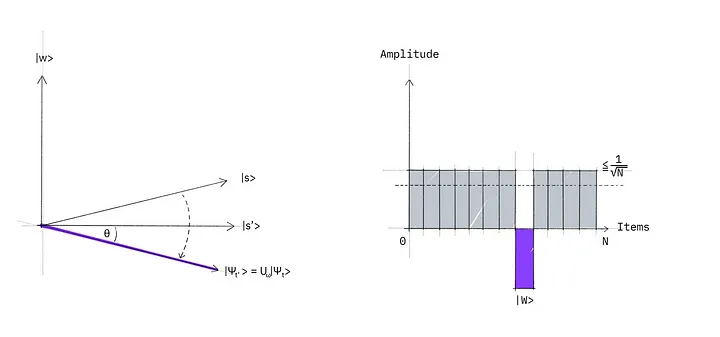

In [ ]:
def grover_oracle_matrix(n_qubits, is_target_fn):
    """
    Cria a matriz de um oráculo para o algoritmo de Grover.

    Esta função cria a matriz de um oráculo que marca os elementos desejados no
    espaço de busca do algoritmo de Grover usando uma função fornecida para
    determinar se um elemento é o desejado ou não.

    Args:
        * n (int): O número de qubits no espaço de busca.
        * is_target_fn (callable): Uma função que aceita um elemento do espaço
            de busca como entrada e retorna True se o elemento for o desejado,
            caso contrário, retorna False.

    Returns:
        numpy.ndarray: A matriz de oráculo marcando os elementos desejados.
        [int]: A lista de soluções da função target para o espaço de busca.

    Example:
        Para criar um oráculo que marca elementos desejados usando uma função de
        verificação personalizada, você pode chamar a função da seguinte forma:

        >>> def parity_bit_checker(element):
        ...     # Verifica se o número de bits 1 no elemento é par.
        ...     return bin(element).count('1') % 2 == 0
        >>> oracle, solutions = grover_oracle_matrix(4, parity_bit_checker)
    """
    oracle = np.eye(2 ** (n_qubits+1))
    marked_elements = [qubit for qubit in range(2**n_qubits) if is_target_fn(qubit)]
    for marked_element in marked_elements:
        oracle[marked_element][marked_element] = -1

    return oracle, marked_elements

## Difusor
O difusor serve pra para aumentar a amplitude da solução desejada (a solução que é "selecionada" pelo oráculo). Ele é uma matriz de tamanho NxN que inverte a entrada que inverte a solução desejada sobre a média das probabilidades e amplifica o estado desejado, consequentemente reduzindo a probabilidade dos estados que não foram "escolhidos" pelo oráculo.

Note que a entrada já deve ter passado pelo oráculo antes de passar pelo difusor, a ordem é importante.

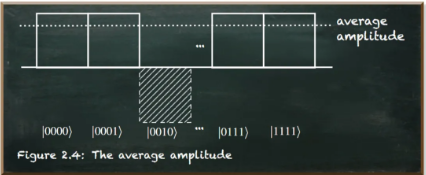

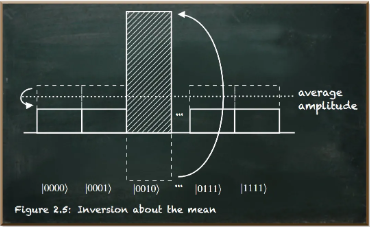

In [ ]:
def grover_diffuser_matrix(n_qubits):
  """
  Cria a matriz do difusor para o algoritmo de Grover.

  O difusor é uma matriz unitária que amplifica a probabilidade dos estados
  marcados (soluções) e diminui a probabilidade dos outros estados no espaço
  de busca.

  Args:
      n_qubits (int): O número de qubits no espaço de busca.

  Returns:
      numpy.ndarray: A matriz do difusor.

  Example:
      Para criar um difusor para um espaço de busca com 3 qubits, você pode
      chamar a função da seguinte forma:

      >>> diffuser = grover_diffuser_matrix(3)
  """
  N = 2 ** n_qubits # número total de estados possíveis
  matrix_with_equal_probabilities = np.full((N, N), 1/N)
  identity_matrix = np.eye(N)
  diffuser = 2 * matrix_with_equal_probabilities - identity_matrix
  return diffuser # uma matriz (N, N) que representa o difusor

## Circuito Quântico

Após a declaração do oráculo e do difusor como blocos separados e genéricos, podemos finalmente escrever o circuito que executa o algoritmo de Grover. Ele segue os seguintes passos:

1.   Inicializar o circuito com um estado ∣0⟩
2.   Aplicar Hadamard para colocar os qubits em superposição
3.   Repetir O(√N) vezes
  1.   Aplicar a operação de inversão de fase (oráculo)
  2.   Aplicar a operação de inversão sobre a média (difusor)
4.   Medir os qubits



In [ ]:
def grover_multi_circuit(n_qubits, is_target_fn):
    """
    Executa o algoritmo de Grover em um circuito quântico utilizando o Qiskit.

    O algoritmo de Grover é um algoritmo quântico de busca que amplifica a
    probabilidade dos estados marcados (soluções) em um espaço de busca não
    estruturado.

    Args:
        n_qubits (int): O número de qubits no circuito quântico.
        is_target_fn (callable): Uma função que aceita um elemento do espaço
            de busca como entrada e retorna True se o elemento for o desejado,
            caso contrário, retorna False.

    Returns:
        QuantumCircuit: Um circuito quântico que implementa o algoritmo de Grover.

    Example:
        Para executar o algoritmo de Grover com 4 qubits, uma função de
        verificação de elementos desejados personalizada e 2 iterações,
        você pode chamar a função da seguinte forma:

        >>> def parity_bit_checker(element):
        ...     # Verifica se o número de bits 1 no elemento é par.
        ...     return bin(element).count('1') % 2 == 0
        >>> n_qubits = 4
        >>> results = grover_algorithm(n_qubits, custom_target_fn)
        >>> print(results)
    """
    # Inicialização do circuito quântico.
    qc = QuantumCircuit(n_qubits+1, n_qubits)

    # Superposição de estados.
    # Aplicação de Hadamard em todos os qubits.
    for qubit in range(n_qubits+1):
        qc.h(qubit)

    # Oraculo e Difusor de Grover.
    oracle, solutions = grover_oracle_matrix(n_qubits, is_target_fn)
    diffuser = grover_diffuser_matrix(n_qubits)

    # Quantidade de iterações necessárias para execução do algoritmo de Grover.
    k = int(np.round(np.pi / 4 * (np.sqrt(2 ** n_qubits / len(solutions)))))

    # Adição do operador de Grover k vezes no circutio quântico.
    for index in range(k):
      qc.unitary(oracle, range(n_qubits+1), label=f'grover-oracle-{index}')
      qc.unitary(diffuser, range(n_qubits), label=f'grover-diffuser-{index}')

    # Medição dos qubits.
    qc.measure(range(n_qubits), range(n_qubits))

    return qc

A quantidade de iterações necessárias é aproximadamente igual a 𝝅 / 4 * √N:

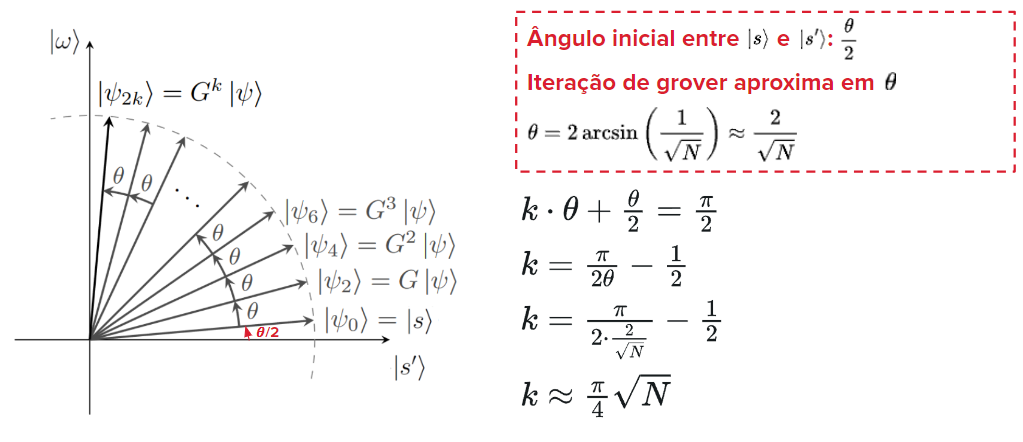

## Execução do Circuito
Para finalizar o processo, consolidamos tudo em uma função chamada `run_quantum_circuit`. Essa função aceita como entrada o circuito quântico desejado (neste caso, nosso circuito de Grover) e o número de execuções, conhecido como "shots". Ela é capaz de simular o circuito e devolver as contagens correspondentes aos resultados de cada medição.

In [ ]:
def run_quantum_circuit(circuit, shots=1024):
    """
    Executa um circuito quântico utilizando o Qiskit.

    Esta função recebe um circuito quântico como entrada, executa-o em um
    simulador quântico e retorna os resultados, incluindo um histograma
    das medições.

    Args:
        circuit (QuantumCircuit): O circuito quântico a ser executado e visualizado.
        shots (int): O número de repetições (tiros) das medições (padrão é 1024).

    Returns:
        dict: Um dicionário contendo as contagens dos resultados de medição dos qubits.

    Example:
        Para executar e visualizar um circuito quântico chamado 'grover_circuit'
        com 8192 tiros, você pode chamar a função da seguinte forma:

        >>> from qiskit.visualization import plot_histogram
        >>> counts = run_quantum_circuit(grover_circuit, shots=8192)
        >>> print(counts)
        >>> plot_histogram(counts)
    """
    # Simulação do circuito quântico.
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=shots).result()
    counts = result.get_counts()

    return counts

## Funções Auxiliares

Como comentamos anteriormente, o Oráculo mapeia uma função caixa preta (`is_target_fn`) que indica se um determinado elemento apresenta uma propriedade que estamos buscando. Assim, para possibilitar o desenvolvimento do oráculo neste documento, criamos algumas funções de teste para validação do algoritmo.

Para isso, criamos as seguintes funções.

In [ ]:
def is_even_parity(element):
    """
    Verifica se a representação binária do elemento tem paridade par.

    Esta função recebe um número inteiro 'element' e verifica se a quantidade de
    bits '1' na sua representação binária tem paridade par. Se tiver, a função
    retorna True; caso contrário, retorna False.

    Args:
        element (int): O número inteiro a ser verificado quanto à paridade dos bits.

    Returns:
        bool: True se a paridade dos bits for par, False caso contrário.

    Example:
        Para verificar se o número inteiro 10 tem paridade par, você pode chamar a
        função da seguinte forma:

        >>> is_even_parity(10)
        True

        Para verificar se o número inteiro 7 tem paridade par, você pode chamar a
        função da seguinte forma:

        >>> is_even_parity(7)
        False
    """
    count_ones = bin(element).count('1')
    return count_ones % 2 == 0

def is_odd_parity(element):
    """
    Verifica se a representação binária do elemento tem paridade ímpar.

    Esta função recebe um número inteiro 'element' e verifica se a quantidade de
    bits '1' na sua representação binária tem paridade ímpar. Se tiver, a função
    retorna True; caso contrário, retorna False.

    Args:
        element (int): O número inteiro a ser verificado quanto à paridade dos bits.

    Returns:
        bool: True se a paridade dos bits for ímpar, False caso contrário.

    Example:
        Para verificar se o número inteiro 10 tem paridade ímpar, você pode
        chamar a função da seguinte forma:

        >>> is_odd_parity(10)
        False

        Para verificar se o número inteiro 7 tem paridade ímpar, você pode
        chamar a função da seguinte forma:

        >>> is_even_parity(7)
        True
    """
    return not is_even_parity(element)

def has_alternating_bits(element):
    """
    Verifica se a representação binária do elemento tem bits alternantes (01 ou 10).

    Esta função recebe um número inteiro 'element' e verifica se a representação
    binária do elemento possui bits alternantes, ou seja, se os bits alternam
    entre 0 e 1 ou entre 1 e 0.

    Args:
        element (int): O número inteiro a ser verificado quanto à alternância dos bits.

    Returns:
        bool: True se a representação binária do elemento tiver bits alternantes, False caso contrário.

    Example:
        Para verificar se o número inteiro 10 possui bits alternantes, você pode chamar a
        função da seguinte forma:

        >>> has_alternating_bits(10)
        True

        Para verificar se o número inteiro 7 possui bits alternantes, você pode chamar a
        função da seguinte forma:

        >>> has_alternating_bits(7)
        False
    """
    sequence = bin(element)
    for i in range(len(sequence) - 1):
        if sequence[i] == sequence[i+1]:
            return False
    return True

def is_even(element):
    """
    Verifica se o número inteiro fornecido é par.

    Args:
        element (int): O número inteiro a ser verificado quanto à paridade.

    Returns:
        bool: True se o número for par (resto da divisão por 2 é 0), False caso contrário.

    Example:
        Para verificar se o número inteiro 10 é par, você pode chamar a função da seguinte forma:

        >>> is_even(10)
        True
    """
    return element % 2 == 0

def is_odd(element):
    """
    Verifica se o número inteiro fornecido é ímpar.

    Args:
        element (int): O número inteiro a ser verificado quanto à paridade.

    Returns:
        bool: True se o número for ímpar (resto da divisão por 2 é 1), False caso contrário.

    Example:
        Para verificar se o número inteiro 7 é ímpar, você pode chamar a função da seguinte forma:

        >>> is_odd(7)
        True
    """
    return not is_even(element)

def is_zero(element):
    """
    Verifica se o número inteiro fornecido é zero.

    Args:
        element (int): O número inteiro a ser verificado quanto ao seu valor.

    Returns:
        bool: True se o número for zero, False caso contrário.

    Example:
        Para verificar se o número inteiro 7 é zero, você pode chamar a função
        da seguinte forma:

        >>> is_zero(7)
        False
    """
    return element == 0

def is_perfect_square(element):
    """
    Verifica se o número é quadrado perfeito.

    Esta função recebe um número inteiro 'element' e verifica se o número é
    quadrado perfeito, ou seja, se a raiz quadrada desse número é um número
    inteiro perfeito.

    Args:
        element (int): O número inteiro a ser verificado quanto à raiz quadrada perfeita.

    Returns:
        bool: True se a raiz quadrada do número for um número inteiro perfeito, False caso contrário.

    Example:
        Para verificar se a raiz quadrada do número inteiro 25 é um número
        inteiro perfeito, você pode chamar a função da seguinte forma:

        >>> is_perfect_root(25)
        True

        Para verificar se a raiz quadrada do número inteiro 10 é um número
        inteiro perfeito, você pode chamar a função da seguinte forma:

        >>> is_perfect_root(10)
        False
    """
    return element ** (1/2) == int(element**(1/2))

# Examplo de valor numérico.
element = 13

print(f'Int: {element} -> BIN: {bin(element)}')
print("Paridade Par:", is_even_parity(element))
print("Paridade Ímpar:", is_odd_parity(element))
print("Tem Bits Alternantes:", has_alternating_bits(element))
print("É Par:", is_even(element))
print("É Ímpar:", is_odd(element))
print("É Zero:", is_zero(element))
print("É Raiz Perfeita:", is_perfect_square(element))

Int: 13 -> BIN: 0b1101
Paridade Par: False
Paridade Ímpar: True
Tem Bits Alternantes: False
É Par: False
É Ímpar: True
É Zero: False
É Raiz Perfeita: False


## Parâmetros do Problema

Para a execução ponta a ponta do circuito quântico, precisamos definir alguns parametros que são necessários para a modelagem do problema. Assim, nesta etapa do processo, definimos os valores para a quantidade de qubits que serão utilizados no algoritmo (`n_qubits`) e a função caixa preta que será modelada pelo oráculo (`is_target_fn`).

Assim, dado que temos os parametros de execução do algoritmo de Grover definidos, realizamos a construção do circuito quântico e, posteriormente, somos capazes de visualizar a sua estrutura.

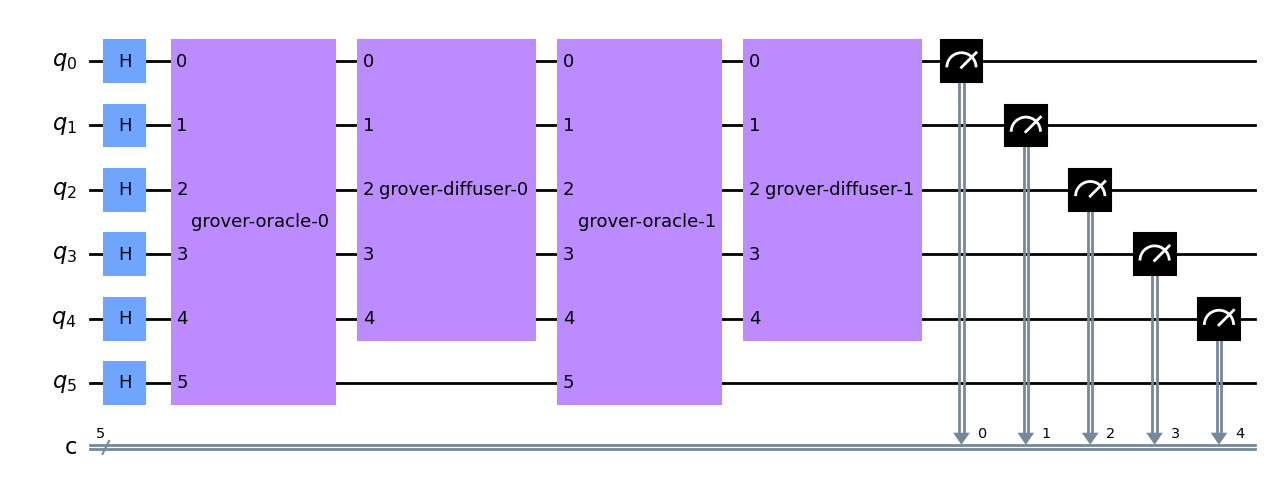

In [ ]:
# Parâmetros do problema.

# Número de qubits
n_qubits = 5

# Função do Oráculo.
is_target_fn = is_perfect_square

# Criação e execução do circuito quântico.
circuit = grover_multi_circuit(n_qubits, is_target_fn)
circuit.draw(output='mpl')

## Resultados

Após a construção do circuito quântico, podemos realizar a sua execução e analisar os resultados obtidos, de modo a verificar se a busca ocorreu de maneira correta e, consequentemente, nos forneceu os valores esperados de acordo com o espaço de busca e para a função mapeada para o oráculo.

Measurement result: {'00111': 32, '11101': 48, '10000': 147, '10011': 58, '01001': 138, '11010': 42, '10001': 48, '00101': 51, '10101': 40, '10010': 40, '10100': 57, '10111': 46, '11100': 41, '01111': 38, '11011': 56, '11111': 63, '11000': 54, '00100': 123, '00010': 42, '01011': 37, '00011': 65, '01101': 52, '00001': 132, '00110': 34, '00000': 122, '11001': 146, '10110': 49, '01010': 50, '01000': 46, '01100': 55, '01110': 45, '11110': 51}


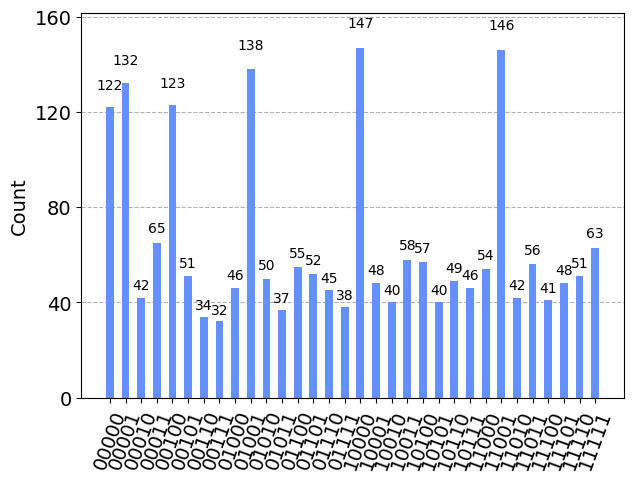

In [ ]:
# Visualização dos resultados.
result = run_quantum_circuit(circuit, 2048)
print(f'Measurement result: {result}')
plot_histogram(result)